<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_One/blob/master/DE_OPTIM_ANN_stat_Insight_DIVERSIDADE_3x4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 129 (delta 72), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (129/129), 314.96 KiB | 1.06 MiB/s, done.
Resolving deltas: 100% (72/72), done.
/content/Raianars_paper_One/ANN_read_matrix/Raianars_paper_One


In [0]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=10 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=100 #10 # PONTOS quantas vezes vai alteral NPAR 

mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão
############################### Função

dim=10
#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel'
fchoice='Rastrigin'
Fun=Function.Rastrigin

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS

In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [24]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/Raianars_paper_One/ANN_read_matrix/Raianars_paper_One/ANN_read_matrix


In [0]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [0]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [0]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [0]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [0]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [0]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [0]:
##################################### 
start_time = time.time()

#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO

p=int(TOTAL/its/ITE) 
NPAR=p

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
for i in range(rodadas):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO
 
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  bounds=[(p, p)] * PONTOS


  DIo=1e99
  
  CRo=crossp;Fo=mut;
  #Xo=np.copy(X)
  #XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X)
  Fitness = np.asarray([Fun(ind) for ind in X])
  XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X,Fitness)
  nrow,ncol=X.shape

  QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
  MAT_INDo[0,5]=nrow  # VALOR NP
  MAT_INDo[0,6]=Fo    # VALOR Fo   
  MAT_INDo[0,7]=CRo   # VALOR CRo
  
  #MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL)
  MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                       syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                       X_min_CR,Fc,fields,Fun)
  
  DIo=np.copy(MAT_INDo[0,0])
  pd.set_option('display.max_columns', 30)  
  MAT_INDo[0,15]=Fo    # VALOR Fo   
  MAT_INDo[0,16]=CRo   # VALOR CRo
  MAT=[]
  for loop in range(ITE):
    X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
    
    #MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL)
    MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
    
    BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
    MAT.append(MAT_IND.ravel())
    
    MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
    MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo

TIME = (time.time() - start_time)

NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
df  = pd.DataFrame(MAT, columns=NOMES)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)


In [32]:
TIME

5.358905553817749

Text(0.5, 1.0, 'Rastrigin_Diversidade_D=10')

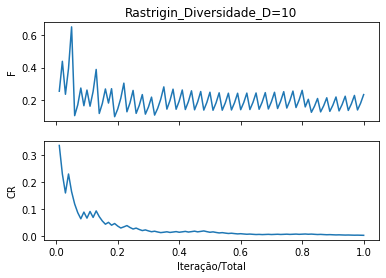

In [33]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)

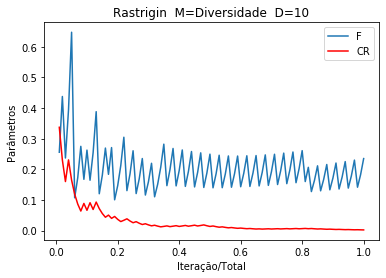

In [34]:
fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()

Text(0, 0.5, 'CR')

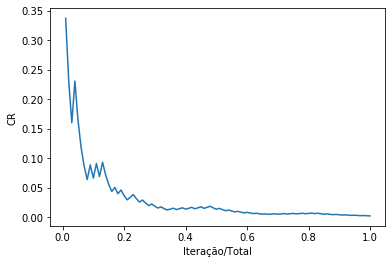

In [35]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

In [0]:
F=list(df['F'])
CR=list(df['CR'])
PARTIC=F+CR
#print(PARTIC)
#print(len(PARTIC))

In [37]:
'''
m=10 # Multiplicador do número de avaliações FO
NPAR=m*dim
ITE=int((len(PARTIC))/2) # PONTOS quantas vezes vai alteral NPAR
its=int(100/ITE) # quantas vezes vai usar o NPAR antes de alterar de novo
TOTAL=m*dim*its*ITE # Avaliações FO
'''

'\nm=10 # Multiplicador do número de avaliações FO\nNPAR=m*dim\nITE=int((len(PARTIC))/2) # PONTOS quantas vezes vai alteral NPAR\nits=int(100/ITE) # quantas vezes vai usar o NPAR antes de alterar de novo\nTOTAL=m*dim*its*ITE # Avaliações FO\n'

In [0]:
NMAX=900 # maximo tamanho gerar populacao

start_time = time.time()
BEST_AGENTS=[]

for i in range(RUNS):  
    SOMA=0
    pop = np.random.rand(NMAX, dim)
    diff=np.zeros(PAR)
    for ii in range(PAR):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
   
    ind_crossp=ITE-1
    for k in range(ITE):
      ind_crossp=ind_crossp+1
      mut=np.copy(PARTIC[k])
      crossp=np.copy(PARTIC[ind_crossp])
      #print(crossp)
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp, NPAR, its,Fun,X,SOMA,TOTAL)
     
    BEST_AGENTS.append(BEST_XY)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

In [39]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)

DE_POP_VAR_F_CR TOTAL= 10000 Iterações= 100 Dim= 10 Min/Max= -5.12 / 5.12 _ Rastrigin
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-10_Interv-100 

MÉDIA:  2.31972168252572
MIN __: 0.924985453320673
MAX__:  3.9174845206317883
STD __: 0.8934009468807975
Tempo Médio= 3.758 segundos ---
10 Rodadas

BEST:  [-0.04256727 -0.0103878  -0.04137549  0.0085831   0.01490813 -0.01489433
  0.02022642 -0.01037653 -0.00203156 -0.00363145  0.92498545]
